# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [3]:
df.left_company.value_counts()
df.columns

Index(['left_company', 'age', 'frequency_of_travel', 'department',
       'commuting_distance', 'education', 'satisfaction_with_environment',
       'gender', 'seniority_level', 'position', 'satisfaction_with_job',
       'married_or_single', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')

The target is evenly weighted. Model performance could have been affected if there was a sizable disparity between the number of cases in each class in the dataset.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [4]:
num_vars = ['age', 'commuting_distance', 'last_performance_rating', 
                  'last_raise_pct', 'satisfaction_with_environment', 'satisfaction_with_job',
                  'total_years_working', 'years_at_company', 'years_in_current_job',
                  'years_since_last_promotion', 'years_with_current_supervisor']

cat_vars = ['department', 'education', 'frequency_of_travel', 'gender',
                    'married_or_single', 'position']

The variables on lickert scale or the ones on continuous scale or the ones which are ordinal, are numerical variables.

The categorical variables are the ones which have strings, or non ordinal education(they are in category)

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

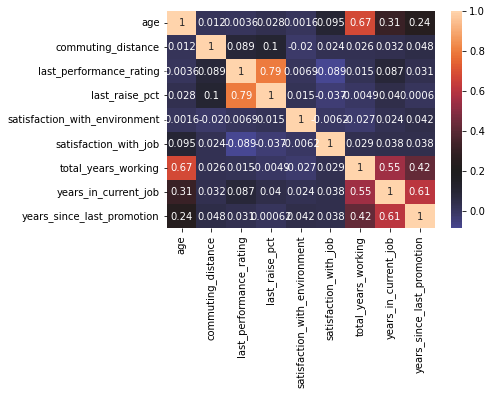

In [10]:
df_num = df[num_vars]

# CORRELATION MATRIX
correlation = df_num.corr()

import seaborn as sns

# HEATMAP
sns.heatmap(correlation, center=0.2, annot=True)
plt.show()

In [6]:
num_vars.remove('years_with_current_supervisor')
num_vars.remove('years_at_company')

We have dropped the variables which had the correlation greater than 0.8 (years_at_company)

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [7]:
# insert code here
from sklearn.model_selection import train_test_split
target = 'left_company'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 124)

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [13]:
# insert code here
# CATEGORICAL
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# NUMERICAL 
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


# COMBINATIOIN
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# IMPLEMENTATION OF TRANSFORMATION
X_train_processed = preprocessor.fit_transform(X_train)

# VERIFICATION OF SHAPES
print('Shape of Numerical data :',X_train_processed[:, :len(num_vars)].shape)
print('Shape of Categorical data :',X_train_processed[:, len(cat_vars):].shape)


Shape of Numerical data : (800, 9)
Shape of Categorical data : (800, 28)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#CREATION OF PIPELINE
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# IMPLEMENTATION
pipeline.fit(X_train, y_train)

# PREDICTION AND ACCURACY ON TRAIN DATA
y_train_prediction = pipeline.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# PREDICTION AND ACCURACY ON TEST DATA
y_test_prediction = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Training set accuracy - {:.3f}".format(accuracy_train))
print("Test set accuracy - {:.3f}".format(accuracy_test))


Training set accuracy - 0.733
Test set accuracy - 0.685


Since the variation in accuracy here is less than 5%, there is no issue. Given that it performs nearly the same on both training and test data, this model does not experience the overfitting issue.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Reducing the number of variables used and applying stricter standards for multicolinearity of 0.7 are two possible actions. Because Logistic Regression lacks a hyperparameter, grid search methods are useless. Large data use, feature engineering, and cross validation (to assess the model) may also be taken into account.